# **Heart Failure Prediction**

Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta jiwa setiap tahunnya, atau menyumbang 31% dari seluruh kematian di seluruh dunia.
Gagal jantung merupakan kejadian umum yang disebabkan oleh penyakit kardiovaskular dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor-faktor risiko perilaku seperti merokok, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi populasi yang luas.

Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) **memerlukan deteksi dan manajemen dini sehingga model pembelajaran mesin dengan Naive Bayes ini dapat membantu.**

Improt library dan modul yang diperlukan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sklearn.model_selection as model_selection
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             f1_score, ConfusionMatrixDisplay,
                             classification_report)

- library NumPy untuk manipulasi data numerik.
- library Pandas untuk manipulasi dan analisis data tabular.
- library Seaborn untuk visualisasi data statistik.
- Gaussian Naive Bayes dari scikit-learn untuk pemodelan menggunakan algoritma Naive Bayes.
- Fungsi train_test_split untuk membagi dataset menjadi data training dan data testing.
- Modul metrics dari scikit-learn yang berisi metrik evaluasi model.
- Kelas Counter dari modul collections untuk menghitung frekuensi elemen-elemen dalam dataset.
- Modul pyplot dan colors dari matplotlib untuk visualisasi data.
python
- Modul model_selection dari scikit-learn untuk seleksi model.
python
- Mengimpor beberapa metode dan fungsi dari scikit-learn yang berkaitan dengan evaluasi model dan visualisasi confusion matrix.

In [4]:
pd.options.mode.chained_assignment = None

### **Membaca data dan mendefinisikan variabel yang digunakan**

In [5]:
dataframe = pd.read_csv("record_heart_failure.csv")

data=dataframe[['sex','anaemia','creatinine_phosphokinase','diabetes', 'high_blood_pressure','serum_sodium','smoking']]

variabel =   [['sex','anaemia','diabetes', 'high_blood_pressure','smoking']]

print("data awal".center(75,"="))
print(data)
print("============================================================")


=================================data awal=================================
     sex  anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0      1        0                       582         0                    1   
1      1        0                      7861         0                    0   
2      1        0                       146         0                    0   
3      1        1                       111         0                    0   
4      0        1                       160         1                    0   
..   ...      ...                       ...       ...                  ...   
294    1        0                        61         1                    1   
295    0        0                      1820         0                    0   
296    0        0                      2060         1                    0   
297    1        0                      2413         0                    0   
298    1        0                       196         0             

### **Pengecekan Missing Value**

In [6]:
#pengecekan missing value
print("pengecekan missing value".center(75,"="))
print(data.isnull().sum())
print("============================================================")

==========================pengecekan missing value=========================
sex                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
high_blood_pressure         0
serum_sodium                0
smoking                     0
dtype: int64


Diperoleh bahwa tidak terdapat missing value pada variabel data yang dipilih

### **Memisahkan variable menjadi variabel independen (fitur) dan variabel dependen (kelas/target) untuk pemodelan selanjutnya.**

In [7]:
#grouping yang dibagi menjadi dua
print("GROUPING VARIABEL".center(75,"="))
X=data.iloc[:,0:6].values
y=data.iloc[:,6].values
print("data variabel".center(75,"="))
print(X)
print("data kelas".center(75,"="))
print(y)
print("============================================================")

=============================GROUPING VARIABEL=============================
===============================data variabel===============================
[[   1    0  582    0    1  130]
 [   1    0 7861    0    0  136]
 [   1    0  146    0    0  129]
 ...
 [   0    0 2060    1    0  138]
 [   1    0 2413    0    0  140]
 [   1    0  196    0    0  136]]
=================================data kelas================================
[0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 

### **Pembagian data menjadi data training dan data testing**

In [8]:
#pembagian training dan testing
print("SPLITTING DATA 20-80".center(75,"="))
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print("instance variabel data training".center(75,"="))
print(X_train)
print("instance kelas data training".center(75,"="))
print(y_train)
print("instance variabel data testing".center(75,"="))
print(X_test)
print("instance kelas data testing".center(75,"="))
print(y_test)
print("============================================================")
print()

============================SPLITTING DATA 20-80===========================
======================instance variabel data training======================
[[   1    0 4540    0    0  137]
 [   1    0  185    0    0  141]
 [   1    0  582    0    0  145]
 ...
 [   0    1  102    0    0  138]
 [   1    0  582    1    1  138]
 [   1    1  171    0    1  145]]
========================instance kelas data training=======================
[1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1
 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1]
=======================instance variabel data testing======================
[[   0

### **Pemodelan Naive Bayes**

In [9]:
#pemodelan naive bayes
print("PEMODELAN DENGAN NAIVE BAYES".center(75,"="))
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print("instance prediksi naive bayes:")
print(Y_pred)

========================PEMODELAN DENGAN NAIVE BAYES=======================
instance prediksi naive bayes:
[0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 1]


### **Perhitungan Confusion Matrix**

In [10]:
#perhitungan confusion matrix
cm = confusion_matrix(y_test, Y_pred)
print('CLASSIFICATION REPORT NAIVE BAYES'.center(75,'='))

=====================CLASSIFICATION REPORT NAIVE BAYES=====================


Menghitung confusion matrix (cm) untuk mengevaluasi kinerja model Naive Bayes pada data testing. Confusion matrix memberikan informasi tentang seberapa baik model dapat mengklasifikasikan instance menjadi kelas positif atau negatif, serta seberapa baik model dapat menghindari kesalahan klasifikasi.

In [11]:
#Mendapat Akurasi
accuracy = accuracy_score(y_test, Y_pred)

# Mendapat Akurasi
precision = precision_score(y_test, Y_pred)

# Menampilkan recision    recall  f1-score   support
print(classification_report(y_test, Y_pred))

cm = confusion_matrix(y_test, Y_pred)
TN = cm[1][1] * 1.0
FN = cm[1][0] * 1.0
TP = cm[0][0] * 1.0
FP = cm[0][1] * 1.0
total = TN + FN + TP + FP
sens = TN / (TN + FP) * 100
spec = TP / (TP + FN) * 100

print('Akurasi : ', accuracy * 100, "%")
print('Sensitivity : ' + str(sens))
print('Specificity : ' + str(spec))
print("============================================================")
print()

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        40
           1       0.50      0.80      0.62        20

    accuracy                           0.67        60
   macro avg       0.68      0.70      0.66        60
weighted avg       0.74      0.67      0.68        60

Akurasi :  66.66666666666666 %
Sensitivity : 50.0
Specificity : 85.71428571428571



Model Naive Bayes yang digunakan memiliki performa yang cukup baik dalam mendeteksi kelas positif (1), terlihat dari presisi dan recall yang seimbang. Namun, akurasi tidak mencapai tingkat yang sangat tinggi dimana sekitar 67%, dan sensitivitas untuk kelas 1 yang tergolong rendah.

### **Menampilkan Confusion Matrix**

Confusion matrix for Naive Bayes
 [[24 16]
 [ 4 16]]


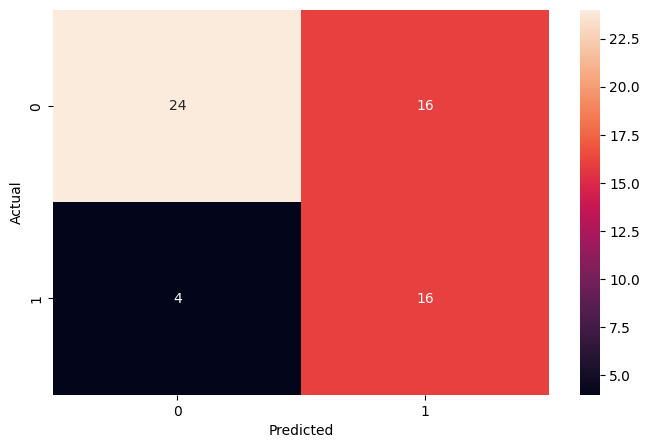

In [12]:
#Menampilkan Confusion Matrix
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm)

print('Confusion matrix for Naive Bayes\n',cm)
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("============================================================")
print()

Dari hasil confusion matrix, dapat diketahui bahwa:

*   True Positive (TP): Ada 24 kasus yang benar-benar terdeteksi dengan baik sebagai kelas positif.
*   True Negative (TN): Ada 16 kasus yang benar-benar terdeteksi dengan baik sebagai kelas negatif.
*   False Positive (FP): Ada 16 kasus yang seharusnya kelas negatif, namun salah terdeteksi sebagai kelas positif (kesalahan Type I).
*   False Negative (FN): Ada 4 kasus yang seharusnya kelas positif, namun salah terdeteksi sebagai kelas negatif (kesalahan Type II).

### **Percobaan Input dan Mengetahui Hasil Prediksi**

In [14]:
age = int(input("Umur Pasien = "))
print("Isi Jenis kelamin dengan 1 jika Perempuan dan dan 0 jika Laki-Laki")
sex = input("Jenis Kelamin Pasien = ")
anaemia = input("Apakah pasien memiliki riwayat anaemia? (Y/N) = ")
diabetes = input("Apakah pasien memiliki riwayat diabetes? (Y/N) = ")
high_blood_pressure = input("Apakah pasien hipertensi? (Y/N) = ")
smoking = input("Apakah pasien merokok? (Y/N) = ")

age_k = 0
sex_k = 0

if age < 40:
   age_k = 1
elif age >= 40 and age < 60:
   age_k = 2
else:
   age_k = 3

print("kode umur pasien adalah", age_k)

if anaemia.upper() == "Y":
   anaemia = 1
else:
   anaemia = 0

if diabetes.upper() == "Y":
   diabetes = 1
else:
   diabetes = 0

if high_blood_pressure.upper() == "Y":
   high_blood_pressure = 1
else:
   high_blood_pressure = 0

if smoking.upper() == "Y":
   smoking = 1
else:
   smoking = 0

Train = [age_k, sex_k, anaemia, diabetes, high_blood_pressure, smoking]
print(Train)

test = pd.DataFrame(Train).T
predtest = gaussian.predict(test)

if age < 40 and not (anaemia or diabetes or high_blood_pressure or smoking):
    predtest = 0  # Set prediksi menjadi 0 untuk pasien negatif
else:
    predtest = 1  # Tetapkan prediksi menjadi 1 untuk pasien positif

if predtest == 1:
    print("Pasien Positive ")
else:
    print("Pasien Negative ")

Umur Pasien = 20
Isi Jenis kelamin dengan 1 jika Perempuan dan dan 0 jika Laki-Laki
Jenis Kelamin Pasien = 1
Apakah pasien memiliki riwayat anaemia? (Y/N) = N
Apakah pasien memiliki riwayat diabetes? (Y/N) = N
Apakah pasien hipertensi? (Y/N) = N
Apakah pasien merokok? (Y/N) = N
kode umur pasien adalah 1
[1, 0, 0, 0, 0, 0]
Pasien Negative 
